In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset and display the first few rows
data = pd.read_csv("sales_data.csv")
data.head()

,Order ID,Product,Quantity,Price,Order Date,Customer
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [33]:
# Data cleaning
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Strategy to handle missing values: Drop rows with missing values
data_cleaned = data.dropna()

# Remove duplicate rows
data_cleaned = data_cleaned.drop_duplicates()

Missing Values:
 Order ID      0
Product       0
Quantity      0
Price         0
Order Date    0
Customer      0
dtype: int64


In [34]:
# Summary statistics
summary_stats = data_cleaned[["Quantity", "Price"]].describe()
print("Summary Statistics:")
print(summary_stats)

# Calculate total sales revenue
data_cleaned["TotalSales"] = data_cleaned["Quantity"] * data_cleaned["Price"]
total_revenue = data_cleaned["TotalSales"].sum()
print("Total Sales Revenue:", total_revenue)

Summary Statistics:
           Quantity         Price
count  18267.000000  18267.000000
mean       1.124760    184.573645
std        0.436651    331.069060
min        1.000000      2.990000
25%        1.000000     11.950000
50%        1.000000     14.950000
75%        1.000000    150.000000
max        7.000000   1700.000000
Total Sales Revenue: 3394606.849999999


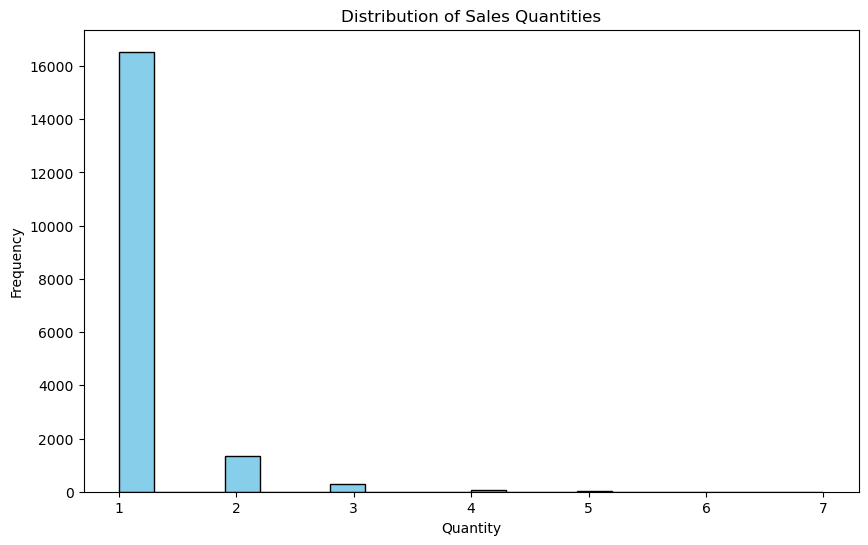

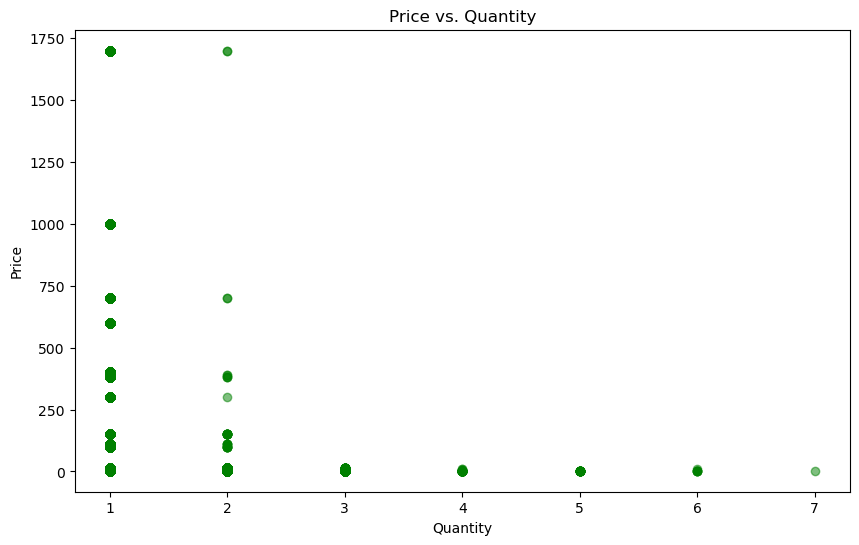

In [35]:
# Visualize data
# Create a histogram of the "Quantity" column
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned["Quantity"], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Sales Quantities")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()

# Generate a scatter plot of "Price" vs. "Quantity"
plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned["Quantity"], data_cleaned["Price"], alpha=0.5, color='green')
plt.title("Price vs. Quantity")
plt.xlabel("Quantity")
plt.ylabel("Price")
plt.show()

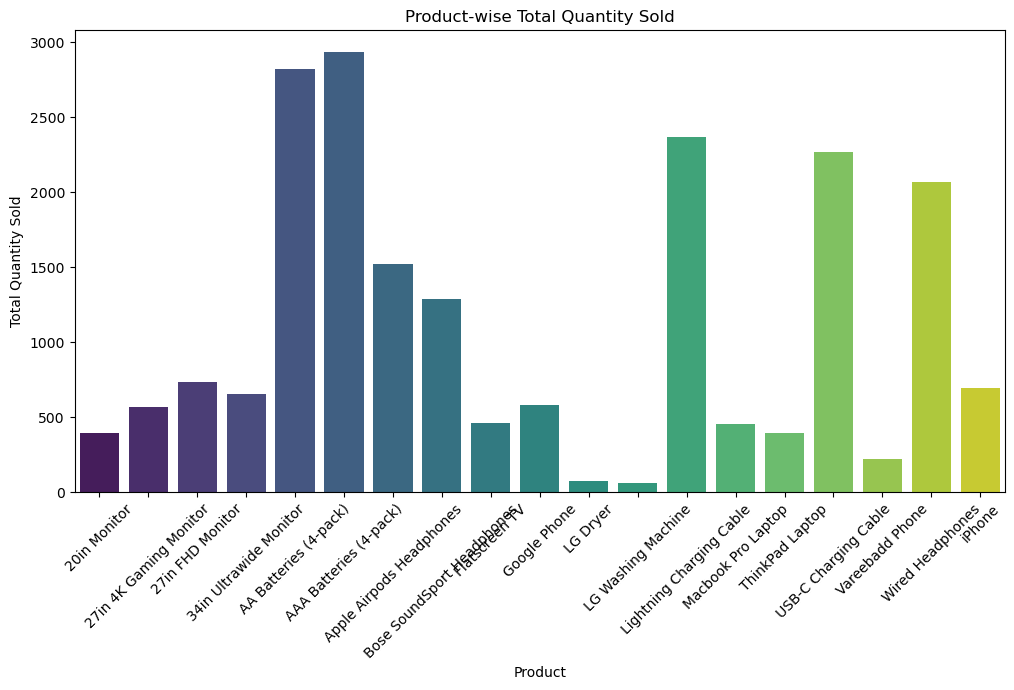

In [36]:
# Categorical analysis
product_group = data_cleaned.groupby("Product").agg({"Quantity": "sum", "Price": "mean"})
product_group.reset_index(inplace=True)

# Visualize product-wise sales using a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x="Product", y="Quantity", data=product_group, palette="viridis")
plt.title("Product-wise Total Quantity Sold")
plt.xlabel("Product")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.show()

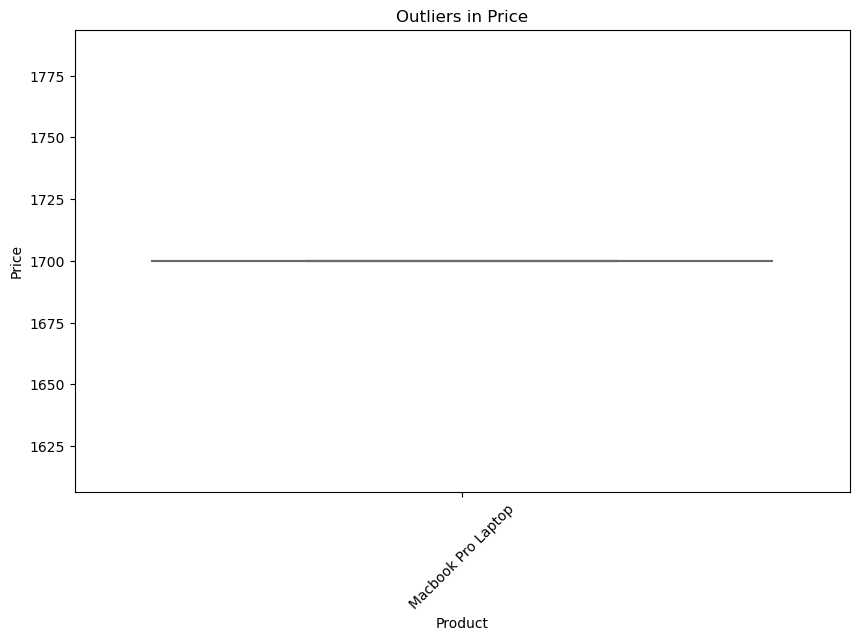

In [37]:
# Identify outliers using z-score and visualize using a box plot
from scipy.stats import zscore

data_cleaned["Price_zscore"] = zscore(data_cleaned["Price"])
outliers = data_cleaned[data_cleaned["Price_zscore"].abs() > 3]

plt.figure(figsize=(10, 6))
sns.boxplot(x=outliers["Product"], y=outliers["Price"], palette="Set3")
plt.title("Outliers in Price")
plt.xlabel("Product")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

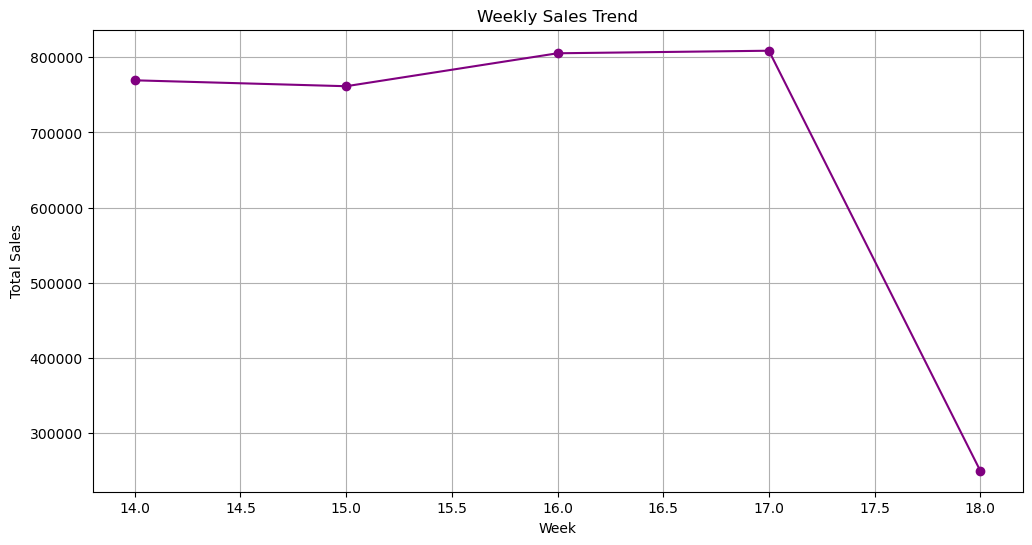

In [52]:
# Additional Analysis - Weekly sales trend
data_cleaned["Order Date"] = pd.to_datetime(data_cleaned["Order Date"])
data_cleaned["Week"] = data_cleaned["Order Date"].dt.isocalendar().week
weekly_sales = data_cleaned.groupby("Week")["TotalSales"].sum()


plt.figure(figsize=(12, 6))
weekly_sales.plot(kind='line', marker='o', color='purple')
plt.title("Weekly Sales Trend")
plt.xlabel("Week")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()